<a href="https://colab.research.google.com/github/AnLe08/Project-ML/blob/main/Using_Unsupervised_Learning_for_Purchasing_Behavior_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset từ UCI Machine Learning Repository.

Mục tiêu là khám phá các phân khúc khách hàng khác nhau để hỗ trợ các chiến lược marketing cá nhân hóa.

### Đọc dữ liệu

In [ ]:
import pandas as pd

# Đọc file CSV vào DataFrame
df = pd.read_csv('/content/Online Retail.csv')

# khám phá dữ liệu
print("Thông tin về DataFrame:")
df.info()

print("\n5 dòng đầu của DataFrame:")
print(df.head())

print("\nThống kê mô tả của các cột số:")
print(df.describe())

print("\nCác giá trị duy nhất trong cột Country:")
print(df['Country'].unique())

print("\nSố lượng giá trị thiếu trong mỗi cột:")
print(df.isnull().sum())

Thông tin về DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB

5 dòng đầu của DataFrame:
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE

###Tiền xử lý dữ liệu

--> giá trị UnitPrice bị âm có thể là lỗi

-- Quantity âm có thể là hành vi trả hàng

***Phân khúc khách hàng dựa trên:***

Hành vi mua hàng: Các sản phẩm họ mua, tần suất mua hàng.

Giá trị đơn hàng: Tổng số tiền họ chi tiêu cho mỗi giao dịch.

Tần suất mua hàng: Họ mua hàng thường xuyên như thế nào.

Tổng giá trị mua hàng: Tổng số tiền họ đã chi tiêu trong suốt lịch sử mua hàng.

Do cusID bị thiếu quá nên ta chọn cách drop mặc dù cusID quan trọng trong việc phân nhóm khách hàng(tần suất khách đến)

In [ ]:
# Loại bỏ các hàng có giá trị CustomerID là NaN
df_cleaned = df.dropna(subset=['CustomerID'])

# Kiểm tra lại số lượng giá trị thiếu sau khi loại bỏ
print("Số lượng giá trị thiếu sau khi loại bỏ các hàng có CustomerID là NaN:")
print(df_cleaned['CustomerID'].isnull().sum())
print(f"Số lượng hàng còn lại: {len(df_cleaned)}")

Số lượng giá trị thiếu sau khi loại bỏ các hàng có CustomerID là NaN:
0
Số lượng hàng còn lại: 406829


In [ ]:
# Loại bỏ các giao dịch có Quantity <= 0
df_cleaned = df_cleaned[df_cleaned['Quantity'] > 0]

# Loại bỏ các giao dịch có UnitPrice <= 0
df_cleaned = df_cleaned[df_cleaned['UnitPrice'] > 0]

# Kiểm tra lại kích thước DataFrame sau khi loại bỏ
print(f"\nSố lượng hàng còn lại sau khi loại bỏ các giao dịch có Quantity hoặc UnitPrice âm: {len(df_cleaned)}")


Số lượng hàng còn lại sau khi loại bỏ các giao dịch có Quantity hoặc UnitPrice âm: 397884


In [ ]:
# Xem thông tin của DataFrame đã làm sạch
print("Thông tin của DataFrame đã làm sạch (df_cleaned):")
df_cleaned.info()

# Xem 5 dòng đầu của DataFrame đã làm sạch
print("\n5 dòng đầu của DataFrame đã làm sạch (df_cleaned):")
print(df_cleaned.head())

Thông tin của DataFrame đã làm sạch (df_cleaned):
<class 'pandas.core.frame.DataFrame'>
Index: 397884 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    397884 non-null  object 
 1   StockCode    397884 non-null  object 
 2   Description  397884 non-null  object 
 3   Quantity     397884 non-null  int64  
 4   InvoiceDate  397884 non-null  object 
 5   UnitPrice    397884 non-null  float64
 6   CustomerID   397884 non-null  float64
 7   Country      397884 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.3+ MB

5 dòng đầu của DataFrame đã làm sạch (df_cleaned):
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365 

--> dữ liệu giảm đi đáng kể 500k-> 300k

### Tạo đặc trưng mới (Feature Engineering)

In [ ]:
# Total spending
# Tính giá trị của mỗi giao dịch
df_cleaned['TotalPrice'] = df_cleaned['Quantity'] * df_cleaned['UnitPrice']

# Tính tổng giá trị mua hàng của mỗi khách hàng
customer_spending = df_cleaned.groupby('CustomerID')['TotalPrice'].sum()

# Hiển thị một vài kết quả
print("Tổng giá trị mua hàng của một vài khách hàng:")
print(customer_spending.head())

Tổng giá trị mua hàng của một vài khách hàng:
CustomerID
12346.0    77183.60
12347.0     4310.00
12348.0     1797.24
12349.0     1757.55
12350.0      334.40
Name: TotalPrice, dtype: float64


In [ ]:
# Frequency and Average Order Value - AOV
# Tính tần suất mua hàng của mỗi khách hàng (số lượng hóa đơn duy nhất)
customer_frequency = df_cleaned.groupby('CustomerID')['InvoiceNo'].nunique()

# Hiển thị một vài kết quả
print("\nTần suất mua hàng của một vài khách hàng:")
print(customer_frequency.head())
# Tính giá trị đơn hàng trung bình của mỗi khách hàng
customer_aov = customer_spending / customer_frequency

# Hiển thị một vài kết quả
print("\nGiá trị đơn hàng trung bình của một vài khách hàng:")
print(customer_aov.head())


Tần suất mua hàng của một vài khách hàng:
CustomerID
12346.0    1
12347.0    7
12348.0    4
12349.0    1
12350.0    1
Name: InvoiceNo, dtype: int64

Giá trị đơn hàng trung bình của một vài khách hàng:
CustomerID
12346.0    77183.600000
12347.0      615.714286
12348.0      449.310000
12349.0     1757.550000
12350.0      334.400000
dtype: float64


In [ ]:
# Tạo DataFrame đặc trưng khách hàng
customer_features = pd.DataFrame(customer_spending)
customer_features.rename(columns={'TotalPrice': 'TotalSpending'}, inplace=True)

# Thêm tần suất mua hàng
customer_features['Frequency'] = customer_frequency

# Thêm giá trị đơn hàng trung bình
customer_features['AOV'] = customer_aov

# Hiển thị một vài dòng đầu của DataFrame đặc trưng khách hàng
print("DataFrame đặc trưng khách hàng:")
print(customer_features.head())

DataFrame đặc trưng khách hàng:
            TotalSpending  Frequency           AOV
CustomerID                                        
12346.0          77183.60          1  77183.600000
12347.0           4310.00          7    615.714286
12348.0           1797.24          4    449.310000
12349.0           1757.55          1   1757.550000
12350.0            334.40          1    334.400000


In [ ]:
# Unique Item Puchased
# Tính số lượng sản phẩm duy nhất đã mua của mỗi khách hàng
customer_unique_items = df_cleaned.groupby('CustomerID')['StockCode'].nunique()
customer_unique_items.rename('UniqueItems', inplace=True)

# Thêm số lượng sản phẩm duy nhất vào DataFrame đặc trưng khách hàng
customer_features['UniqueItems'] = customer_unique_items

# Hiển thị một vài dòng đầu của DataFrame đặc trưng khách hàng
print("\nDataFrame đặc trưng khách hàng (bao gồm số lượng sản phẩm duy nhất):")
print(customer_features.head())


DataFrame đặc trưng khách hàng (bao gồm số lượng sản phẩm duy nhất):
            TotalSpending  Frequency           AOV  UniqueItems
CustomerID                                                     
12346.0          77183.60          1  77183.600000            1
12347.0           4310.00          7    615.714286          103
12348.0           1797.24          4    449.310000           22
12349.0           1757.55          1   1757.550000           73
12350.0            334.40          1    334.400000           17


### chuẩn hóa dữ liệu (Data Scaling)

In [ ]:
from sklearn.preprocessing import StandardScaler

# Khởi tạo StandardScaler
scaler = StandardScaler()

# Chuẩn hóa các đặc trưng trong DataFrame customer_features
scaled_features = scaler.fit_transform(customer_features)

# Tạo DataFrame mới với các đặc trưng đã được chuẩn hóa
scaled_customer_features = pd.DataFrame(scaled_features, index=customer_features.index, columns=customer_features.columns)

# Hiển thị một vài dòng đầu của DataFrame đã được chuẩn hóa
print("DataFrame đặc trưng khách hàng đã được chuẩn hóa:")
print(scaled_customer_features.head())

DataFrame đặc trưng khách hàng đã được chuẩn hóa:
            TotalSpending  Frequency        AOV  UniqueItems
CustomerID                                                  
12346.0          8.358668  -0.425097  42.734017    -0.708802
12347.0          0.250966   0.354417   0.109416     0.486180
12348.0         -0.028596  -0.035340   0.016781    -0.462776
12349.0         -0.033012  -0.425097   0.745065     0.134715
12350.0         -0.191347  -0.425097  -0.047189    -0.521354


### Clustering by K-Means

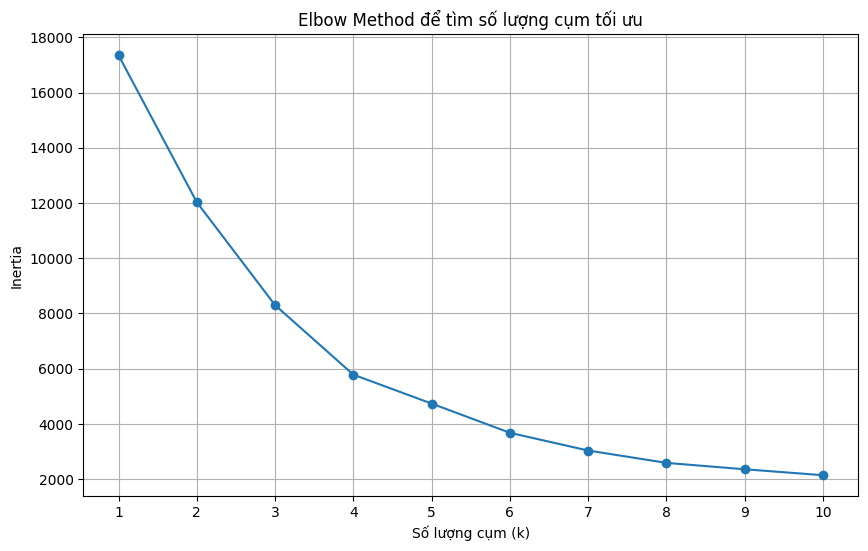

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Danh sách các số lượng cụm tiềm năng
inertia = []
k_range = range(1, 11)  # Thử từ 1 đến 10 cụm

# Tính inertia cho mỗi số lượng cụm
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_customer_features)
    inertia.append(kmeans.inertia_)

# Vẽ biểu đồ Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, marker='o', linestyle='-')
plt.title('Elbow Method để tìm số lượng cụm tối ưu')
plt.xlabel('Số lượng cụm (k)')
plt.ylabel('Inertia')
plt.xticks(k_range)
plt.grid(True)
plt.show()

*** K=5 ***

In [20]:
# Khởi tạo mô hình K-Means với 5 cụm
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)

# Phân nhóm dữ liệu đã được chuẩn hóa
clusters = kmeans.fit_predict(scaled_customer_features)

# Thêm thông tin cụm vào DataFrame đặc trưng khách hàng ban đầu
customer_features['Cluster'] = clusters

# Hiển thị số lượng khách hàng trong mỗi cụm
print("Số lượng khách hàng trong mỗi cụm:")
print(customer_features['Cluster'].value_counts().sort_index())

# Hiển thị một vài dòng đầu của DataFrame với thông tin cụm
print("\nDataFrame đặc trưng khách hàng với thông tin cụm:")
print(customer_features.head())

Số lượng khách hàng trong mỗi cụm:
Cluster
0    3701
1       2
2       3
3      13
4     619
Name: count, dtype: int64

DataFrame đặc trưng khách hàng với thông tin cụm:
            TotalSpending  Frequency           AOV  UniqueItems  Cluster
CustomerID                                                              
12346.0          77183.60          1  77183.600000            1        1
12347.0           4310.00          7    615.714286          103        0
12348.0           1797.24          4    449.310000           22        0
12349.0           1757.55          1   1757.550000           73        0
12350.0            334.40          1    334.400000           17        0


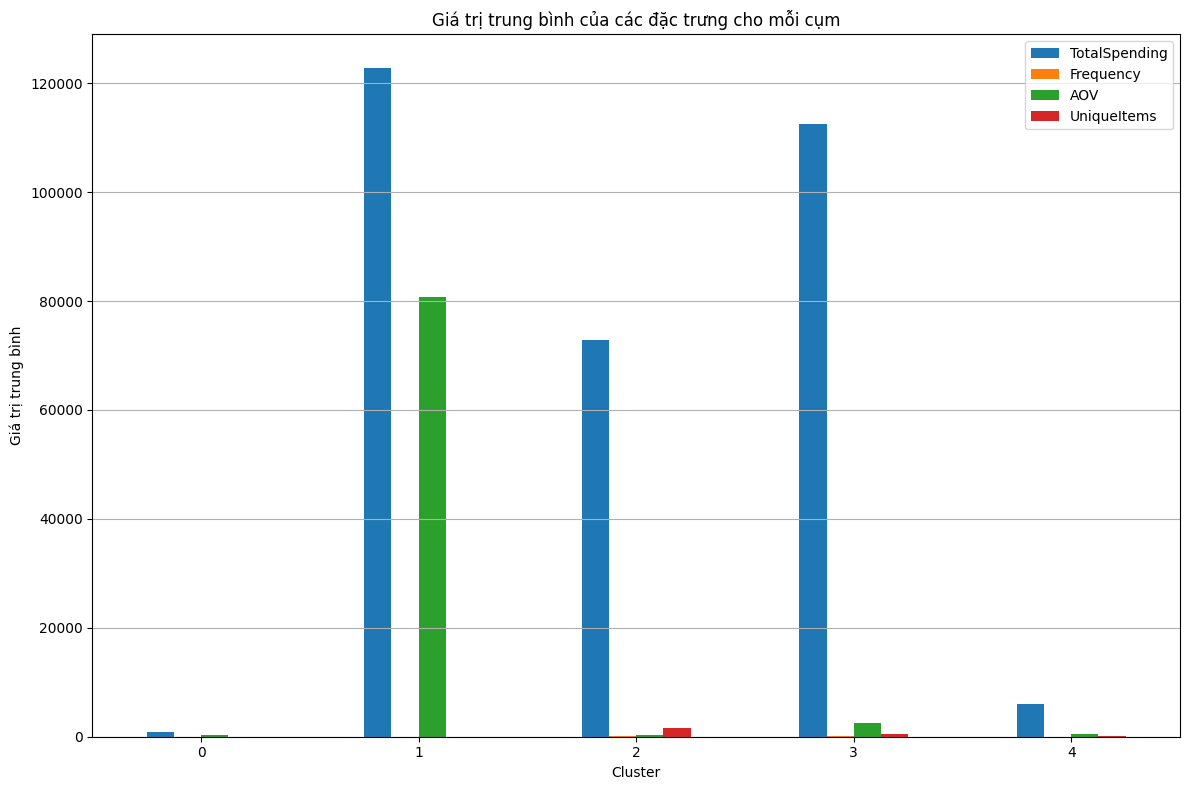

In [21]:
# Tính giá trị trung bình của từng đặc trưng cho mỗi cụm
cluster_means = customer_features.groupby('Cluster').mean()

# Vẽ biểu đồ cột
cluster_means.plot(kind='bar', figsize=(12, 8))
plt.title('Giá trị trung bình của các đặc trưng cho mỗi cụm')
plt.ylabel('Giá trị trung bình')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

### DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

DBSCAN cần eps và min_sample, để ước tính giá trị phù hợp cho eps là sử dụng biểu đồ k-distance.

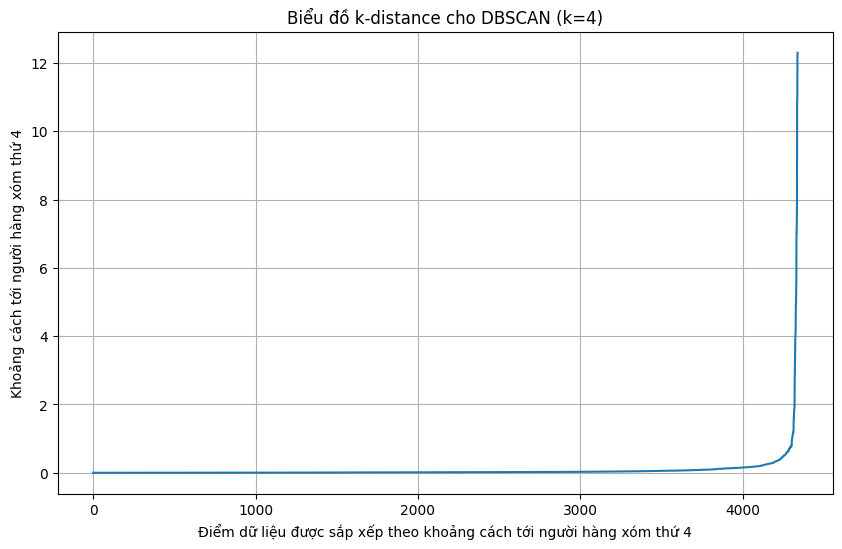

In [22]:
from sklearn.neighbors import NearestNeighbors
import numpy as np

# Tìm k-nearest neighbors (k=4)
neighbors = NearestNeighbors(n_neighbors=4)
neighbors_fit = neighbors.fit(scaled_customer_features)
distances, indices = neighbors_fit.kneighbors(scaled_customer_features)

# Sắp xếp các khoảng cách theo thứ tự tăng dần
distances = np.sort(distances, axis=0)
distances = distances[:,1]

# Vẽ biểu đồ k-distance
plt.figure(figsize=(10, 6))
plt.plot(distances)
plt.title('Biểu đồ k-distance cho DBSCAN (k=4)')
plt.xlabel('Điểm dữ liệu được sắp xếp theo khoảng cách tới người hàng xóm thứ 4')
plt.ylabel('Khoảng cách tới người hàng xóm thứ 4')
plt.grid(True)
plt.show()

-->  một sự tăng lên đáng kể về khoảng cách đến người hàng xóm thứ 4 ở khoảng giá trị y khoảng 0.2 - 0.4. -> eps = 0.3, min_sample = 5

In [30]:
from sklearn.cluster import DBSCAN

# Khởi tạo mô hình DBSCAN với eps=0.3 và min_samples=5
dbscan = DBSCAN(eps=0.5, min_samples=5)

# Phân nhóm dữ liệu đã được chuẩn hóa
dbscan_clusters = dbscan.fit_predict(scaled_customer_features)

# Thêm thông tin cụm DBSCAN vào DataFrame đặc trưng khách hàng
customer_features['DBSCAN_Cluster'] = dbscan_clusters

# Hiển thị số lượng khách hàng trong mỗi cụm (bao gồm cả nhiễu -1)
print("Số lượng khách hàng trong mỗi cụm DBSCAN:")
print(customer_features['DBSCAN_Cluster'].value_counts().sort_index())

# Hiển thị một vài dòng đầu của DataFrame với thông tin cụm DBSCAN
print("\nDataFrame đặc trưng khách hàng với thông tin cụm DBSCAN:")
print(customer_features.head())

Số lượng khách hàng trong mỗi cụm DBSCAN:
DBSCAN_Cluster
-1     127
 0    4203
 1       8
Name: count, dtype: int64

DataFrame đặc trưng khách hàng với thông tin cụm DBSCAN:
            TotalSpending  Frequency           AOV  UniqueItems  Cluster  \
CustomerID                                                                 
12346.0          77183.60          1  77183.600000            1        1   
12347.0           4310.00          7    615.714286          103        0   
12348.0           1797.24          4    449.310000           22        0   
12349.0           1757.55          1   1757.550000           73        0   
12350.0            334.40          1    334.400000           17        0   

            DBSCAN_Cluster  
CustomerID                  
12346.0                 -1  
12347.0                  0  
12348.0                  0  
12349.0                  0  
12350.0                  0  


### Trực quan hoá

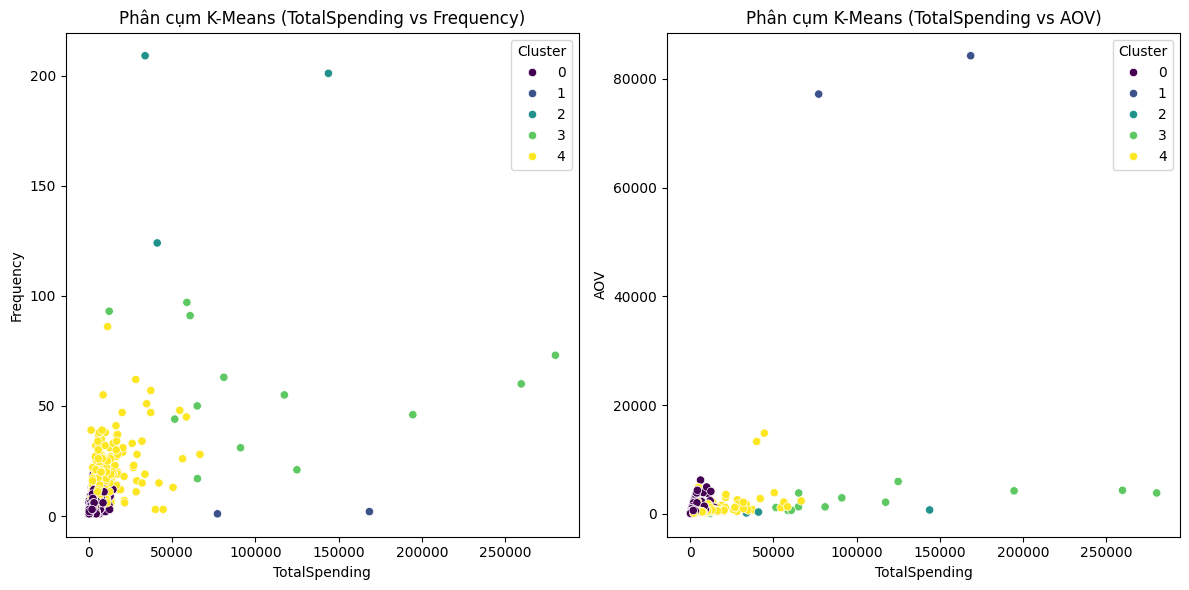

In [26]:
import seaborn as sns
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(data=customer_features, x='TotalSpending', y='Frequency', hue='Cluster', palette='viridis')
plt.title('Phân cụm K-Means (TotalSpending vs Frequency)')

plt.subplot(1, 2, 2)
sns.scatterplot(data=customer_features, x='TotalSpending', y='AOV', hue='Cluster', palette='viridis')
plt.title('Phân cụm K-Means (TotalSpending vs AOV)')

plt.tight_layout()
plt.show()

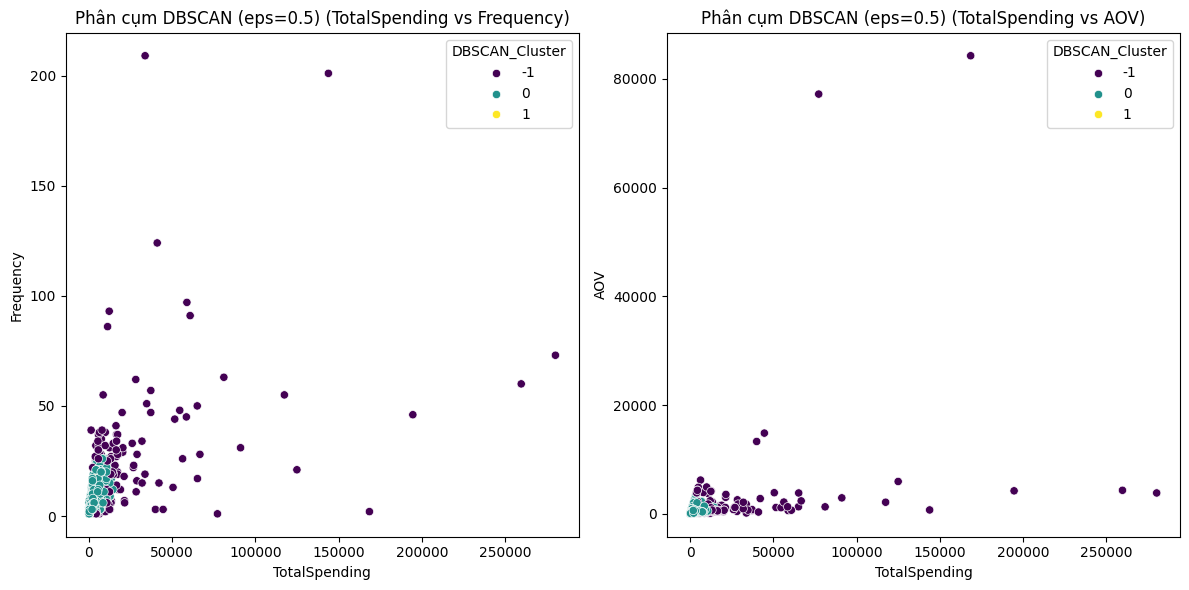

In [32]:
import seaborn as sns
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(data=customer_features, x='TotalSpending', y='Frequency', hue='DBSCAN_Cluster', palette='viridis')
plt.title('Phân cụm DBSCAN (eps=0.5) (TotalSpending vs Frequency)')

plt.subplot(1, 2, 2)
sns.scatterplot(data=customer_features, x='TotalSpending', y='AOV', hue='DBSCAN_Cluster', palette='viridis')
plt.title('Phân cụm DBSCAN (eps=0.5) (TotalSpending vs AOV)')

plt.tight_layout()
plt.show()

--> Tổng kết lại thì K-Means có vẻ tốt hơn so với DBSCAN (do DBSCAN chỉ làm việc với mật độ cao, còn phân nhóm khách hàng thì K-Means phù hợp hơn)

### Dimensionality Reduction

***
PCA
***

In [33]:
from sklearn.decomposition import PCA

# Khởi tạo PCA với 2 thành phần
pca = PCA(n_components=2)

# Fit PCA trên dữ liệu đã chuẩn hóa
pca.fit(scaled_customer_features)

# Transform dữ liệu sang 2 chiều
pca_components = pca.transform(scaled_customer_features)

# Tạo DataFrame với 2 thành phần chính
pca_df = pd.DataFrame(data=pca_components, index=scaled_customer_features.index, columns=['PC1', 'PC2'])

# Thêm thông tin cụm K-Means vào DataFrame PCA
pca_df['Cluster'] = customer_features['Cluster']

# Hiển thị 5 dòng đầu của DataFrame PCA
print("DataFrame PCA:")
print(pca_df.head())

# In tỷ lệ phương sai được giải thích bởi 2 thành phần chính
print("\nTỷ lệ phương sai được giải thích bởi 2 thành phần chính:", pca.explained_variance_ratio_.sum())

DataFrame PCA:
                  PC1        PC2  Cluster
CustomerID                               
12346.0     13.047018  38.869499        1
12347.0      0.638529  -0.091625        0
12348.0     -0.287202   0.169648        0
12349.0     -0.038300   0.690782        0
12350.0     -0.654205   0.194982        0

Tỷ lệ phương sai được giải thích bởi 2 thành phần chính: 0.820010642453798


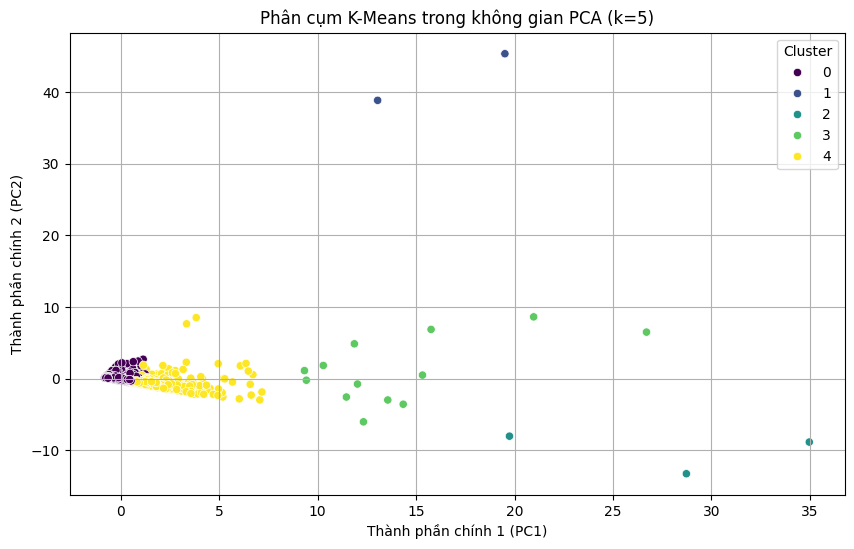

In [34]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Cluster', palette='viridis')
plt.title('Phân cụm K-Means trong không gian PCA (k=5)')
plt.xlabel('Thành phần chính 1 (PC1)')
plt.ylabel('Thành phần chính 2 (PC2)')
plt.grid(True)
plt.show()